In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
titanic = pd.read_csv('train.csv')

In [31]:
# Basic info- Data types, missing values
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [30]:
# Descriptive Statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Fill 'Age' with median
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

<ipython-input-5-c41ed69df6e0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [7]:
# Fill 'Embarked' with mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

<ipython-input-7-851f276fc476>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)


In [14]:
# Drop 'Cabin' column (too many missing values)
titanic.drop('Cabin', axis=1, inplace=True)

In [29]:
# Confirm there is no missing values
print("\nMissing Values After Treatment:\n", titanic.isnull().sum())


Missing Values After Treatment:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [8]:
# Value counts
print("\nSurvived:\n", titanic['Survived'].value_counts())
print("\nPclass:\n", titanic['Pclass'].value_counts())
print("\nSex:\n", titanic['Sex'].value_counts())
print("\nEmbarked:\n", titanic['Embarked'].value_counts())


Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


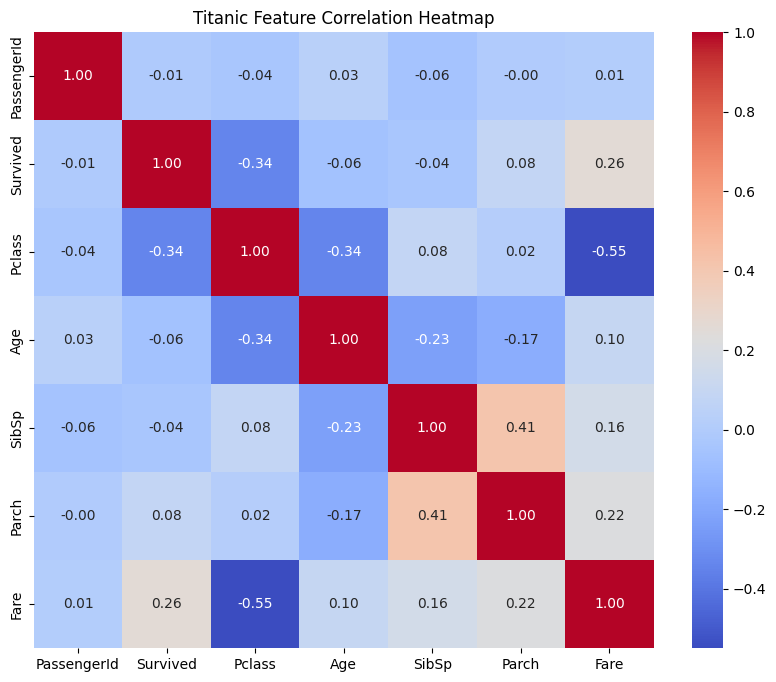

In [11]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(titanic.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numeric columns for correlation
plt.title('Titanic Feature Correlation Heatmap')
plt.show()

<ipython-input-26-d4f7320e6be9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='Survived', palette='Set2')


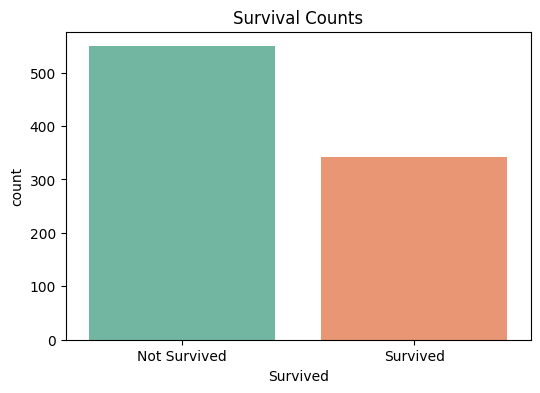

In [26]:
# Survival counts
plt.figure(figsize=(6,4))
sns.countplot(data=titanic, x='Survived', palette='Set2')
plt.title('Survival Counts')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

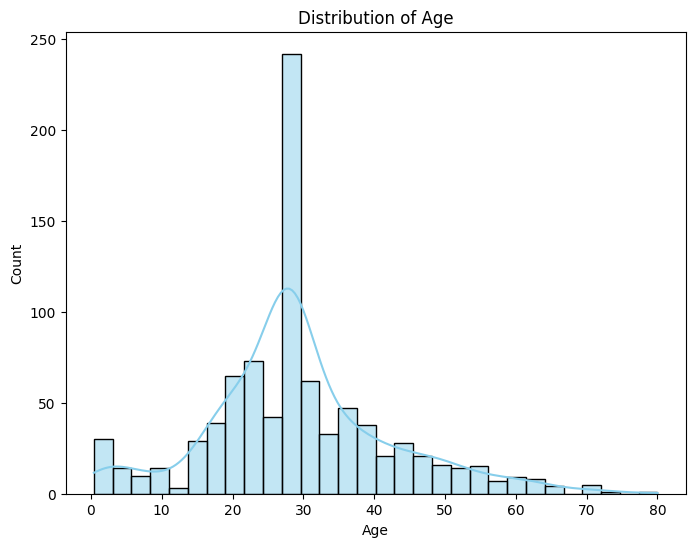

In [21]:
# Plot distribution of 'Age'
plt.figure(figsize=(8,6))
sns.histplot(titanic['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

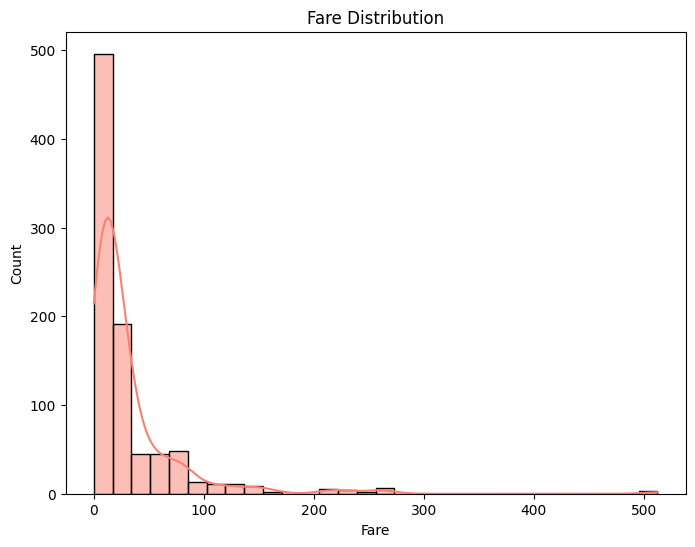

In [13]:
# Fare distribution
plt.figure(figsize=(8,6))
sns.histplot(titanic['Fare'], bins=30, kde=True, color='salmon')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

<ipython-input-17-2ffd640d20c1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic, palette='pastel')


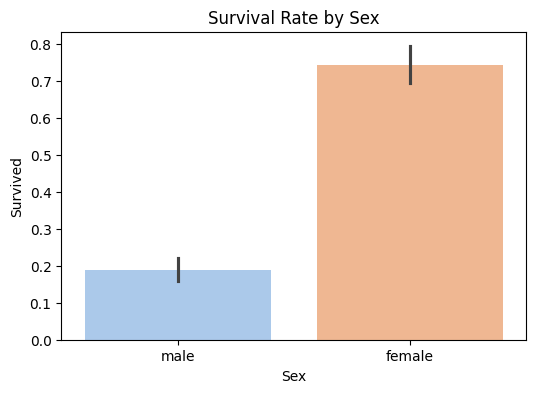

In [17]:
# Survival Rate by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=titanic, palette='pastel')
plt.title('Survival Rate by Sex')
plt.show()

<ipython-input-18-4fa960d5929c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic, palette='muted')


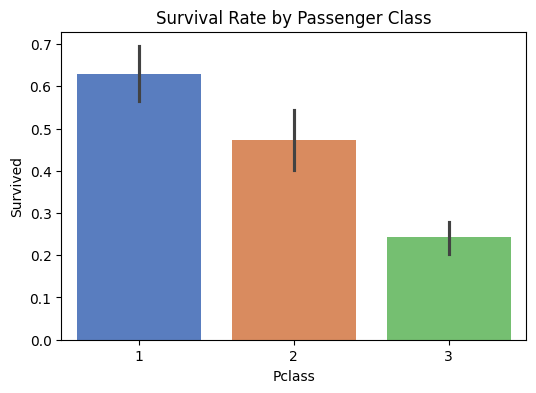

In [18]:
# Survival Rate by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=titanic, palette='muted')
plt.title('Survival Rate by Passenger Class')
plt.show()

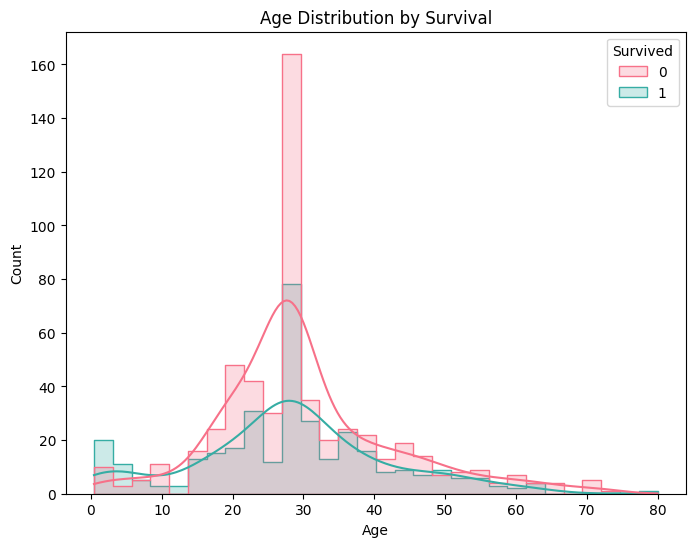

In [23]:
# Age vs Survival
plt.figure(figsize=(8,6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, palette='husl', element="step")
plt.title('Age Distribution by Survival')
plt.show()

<ipython-input-24-669dc4a586d7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Fare', data=titanic, palette='coolwarm')


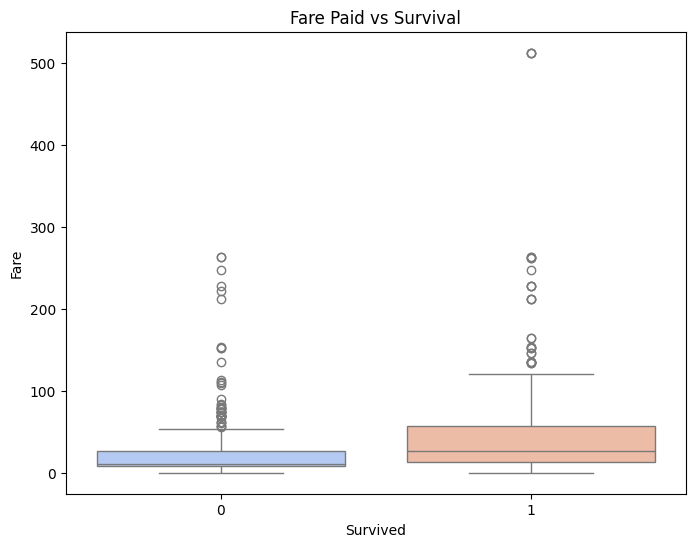

In [24]:
# Fare vs Survival
plt.figure(figsize=(8,6))
sns.boxplot(x='Survived', y='Fare', data=titanic, palette='coolwarm')
plt.title('Fare Paid vs Survival')
plt.show()

<ipython-input-25-af37059399f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=titanic, palette='Accent')


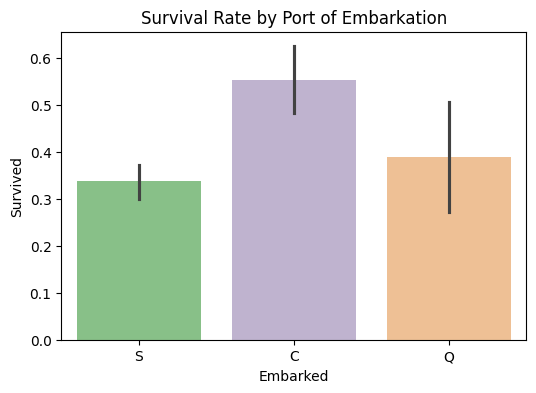

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=titanic, palette='Accent')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

In [27]:
print("""
Summary of Key Insights:
- Female passengers had a significantly higher survival rate compared to male passengers.
- Passengers in 1st class had the highest survival rate, indicating social status influenced survival.
- Younger children (age <10) had a higher chance of survival compared to older adults.
- Survivors generally paid higher fares compared to non-survivors.
- Passengers who embarked from Cherbourg (C) had a higher survival rate compared to Southampton (S) and Queenstown (Q).
- The age distribution is right-skewed. Most passengers are between 20 and 40 years old, with fewer very young or elderly passengers.
- Fare distribution is heavily right-skewed. Majority paid less than 100, but a few outliers paid extremely high fares.
- More people did not survive than survived (~62% non-survivors, ~38% survivors).
""")


Summary of Key Insights:
- Female passengers had a significantly higher survival rate compared to male passengers.
- Passengers in 1st class had the highest survival rate, indicating social status influenced survival.
- Younger children (age <10) had a higher chance of survival compared to older adults.
- Survivors generally paid higher fares compared to non-survivors.
- Passengers who embarked from Cherbourg (C) had a higher survival rate compared to Southampton (S) and Queenstown (Q).
- The age distribution is right-skewed. Most passengers are between 20 and 40 years old, with fewer very young or elderly passengers.
- Fare distribution is heavily right-skewed. Majority paid less than 100, but a few outliers paid extremely high fares.
- More people did not survive than survived (~62% non-survivors, ~38% survivors).

